In [1]:
#Importing all necessary libraries
from brian2 import *

import keras
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from keras.datasets import mnist
import brian2tools
from PIL import Image
from brian2tools import *

%matplotlib inline


Using TensorFlow backend.


# Extracting Spike frequencies from images

In [3]:
def Make_pix_to_spike_dictionary():
    #array containing all pixel intensities from 0 to 255
    pix=range(0,256,1)
    #spike_freq list to store corresponding frequency of the spike train for that pixel intensity value
    spike_freq=[]
    #Initialize frequency=5.1 for Pixel intensity of value 0
    init_spike_freq=5.1
    count=0
    for i in pix:
        if(count==5):
            #Count is used for increasing value of freq after every group of 5 pixel intensities
            count=0
            init_spike_freq+=round(0.1,1)

        count+=1
        spike_freq.append(round(init_spike_freq,1))

    #Linear plot of
    #fig = plt.figure()
    #ax = fig.add_axes([1,1,1,1])
    keys = pix
    values = spike_freq
    pix_to_spk_dict = dict(zip(keys, values))
    #plt.plot(pix,spike_freq)

    #print(pix_to_spk_dict)
    return pix_to_spk_dict

    #plt.savefig('Spike frequencies Vs Pixel intensity values.png', bbox_inches='tight')


In [4]:
pix_to_spk_dict=Make_pix_to_spike_dictionary()
print(pix_to_spk_dict)

{0: 5.1, 1: 5.1, 2: 5.1, 3: 5.1, 4: 5.1, 5: 5.2, 6: 5.2, 7: 5.2, 8: 5.2, 9: 5.2, 10: 5.3, 11: 5.3, 12: 5.3, 13: 5.3, 14: 5.3, 15: 5.4, 16: 5.4, 17: 5.4, 18: 5.4, 19: 5.4, 20: 5.5, 21: 5.5, 22: 5.5, 23: 5.5, 24: 5.5, 25: 5.6, 26: 5.6, 27: 5.6, 28: 5.6, 29: 5.6, 30: 5.7, 31: 5.7, 32: 5.7, 33: 5.7, 34: 5.7, 35: 5.8, 36: 5.8, 37: 5.8, 38: 5.8, 39: 5.8, 40: 5.9, 41: 5.9, 42: 5.9, 43: 5.9, 44: 5.9, 45: 6.0, 46: 6.0, 47: 6.0, 48: 6.0, 49: 6.0, 50: 6.1, 51: 6.1, 52: 6.1, 53: 6.1, 54: 6.1, 55: 6.2, 56: 6.2, 57: 6.2, 58: 6.2, 59: 6.2, 60: 6.3, 61: 6.3, 62: 6.3, 63: 6.3, 64: 6.3, 65: 6.4, 66: 6.4, 67: 6.4, 68: 6.4, 69: 6.4, 70: 6.5, 71: 6.5, 72: 6.5, 73: 6.5, 74: 6.5, 75: 6.6, 76: 6.6, 77: 6.6, 78: 6.6, 79: 6.6, 80: 6.7, 81: 6.7, 82: 6.7, 83: 6.7, 84: 6.7, 85: 6.8, 86: 6.8, 87: 6.8, 88: 6.8, 89: 6.8, 90: 6.9, 91: 6.9, 92: 6.9, 93: 6.9, 94: 6.9, 95: 7.0, 96: 7.0, 97: 7.0, 98: 7.0, 99: 7.0, 100: 7.1, 101: 7.1, 102: 7.1, 103: 7.1, 104: 7.1, 105: 7.2, 106: 7.2, 107: 7.2, 108: 7.2, 109: 7.2, 110: 7.3,

In [5]:
def load_mnist_dataset():
    (train_x, train_y) , (test_x, test_y) = mnist.load_data()
    return (train_x,train_y),((test_x, test_y))

In [6]:
(train_x,train_y),((test_x, test_y))=load_mnist_dataset()
train_x.shape

(60000, 28, 28)

In [7]:
def get_image_pixels(index):
    load_mnist_dataset()
    img=test_x[index]
    test_img = img.reshape(1,784)
    return test_img,img

(28, 28)


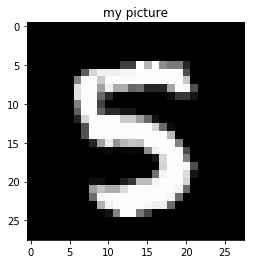

(1, 784)


In [8]:
test_img,img=get_image_pixels(120)
print(img.shape)
mat = np.reshape(img,(28,28))

# Creates PIL image
img = Image.fromarray( mat , 'L')
plt.imshow(img)
plt.title('my picture')
plt.show()
print(test_img.shape)

In [9]:
arr,img=get_image_pixels(120)
print(arr)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0  64  64 255 183 253 140 121 121  38   0
    0   0   0   0   0   0   0   0   0   0   0   0   0  91 212 240 240 240
  246 246 253 252 252 252 252 252  79   0   0   0   0   0   0   0   0   0
    0   0   0   0 133 248 252 202 252 252 252 252 253 252 252 252 252 252
  198   0   0   0   0   0   0   0   0   0   0   0   0   0 226 252 252 161
  239 172 172 102 110  39  39  39 165 

In [10]:
arr.shape

(1, 784)

In [11]:
def get_spike_freqs_from_image(index):
    arr,img=get_image_pixels(index)
    spike_freqs=[]
    pix_to_spk_dict=Make_pix_to_spike_dictionary()
    #print(pix_to_spk_dict)
    #print(type(pix_to_spk_dict))
    for i in arr[0]:
        if(pix_to_spk_dict.get(i)):
            spike_freqs.append(pix_to_spk_dict.get(i))
    return spike_freqs

In [12]:
spike_freqs_img_120=get_spike_freqs_from_image(120)
print(spike_freqs_img_120)

[5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 6.3, 6.3, 10.2, 8.7, 10.1, 7.9, 7.5, 7.5, 5.8, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 6.9, 9.3, 9.9, 9.9, 9.9, 10.0, 10.0, 10.1, 10.1, 10.1, 10.1, 10.1, 10.1, 6.6, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1,

# LIF neuron simulation

In [13]:
import numpy as np
import pandas as pd
import brian2 as b2

In [14]:
import os
import re

from brian2 import *

In [15]:
tau = 2 * msecond        # membrane time constant
Vt = -52 * mvolt          # spike threshold
Vr = -65 * mvolt          # reset value
El = -65 * mvolt          # resting potential (same as the reset)

In [16]:
eqs = '''dv/dt = -(v-El)/tau : volt'''
group = NeuronGroup(28*28, eqs,
                    threshold='v > -50*mV',
                    reset='v = -70*mV')
M = StateMonitor(group, 'v', record=True)

In [17]:
# #By default the time step is 0.1ms
 run(1 * second)

WARNING    c:\users\kaustubh\appdata\local\programs\python\python36\lib\site-packages\Cython\Compiler\Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\KAUSTUBH\.cython\brian_extensions\_cython_magic_dc19346be5788914bf37627ccba857e6.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
 [py.warnings]
  tree = Parsing.p_module(s, pxd, full_module_name)

WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 14.0 is required. Get it with "Microsoft Visual C++ Build Tools": http://landinghub.visualstudio.com/visual-cpp-build-tools (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.d

10000


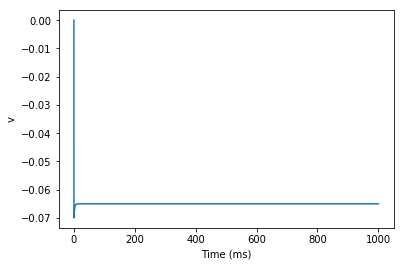

In [18]:
plot(M.t/ms, M.v[0])
print(len(M.t/ms))
xlabel('Time (ms)')
ylabel('v');

# Creating the Input layer

In [19]:
def Plot_raster_plot(spikemonitor):
    plot(spikemonitor.t/ms, spikemonitor.i, '.k')
    xlabel('Time (ms)')
    ylabel('Neuron index');

In [20]:
# plot(M.t/ms, M.v[0])

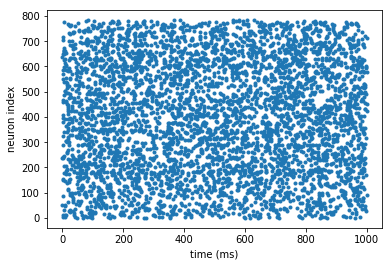

In [21]:
start_scope()
a=spike_freqs_img_120*Hz
P = PoissonGroup(784,a)
W=5*siemens
eqs1 = '''dv/dt = -(v-El)/tau : volt'''

neuron=NeuronGroup(100,eqs1,threshold='v>Vt',reset='v=Vr',method='exact')
neuron.v=Vr
synapses=Synapses(P,neuron,'w: siemens')
synapses.connect()
synapses.w=W

M = SpikeMonitor(P)
N=SpikeMonitor(neuron)
run(1*second)
brian_plot(M)

In [23]:
print(synapses.w)

<synapses.w: array([5., 5., 5., ..., 5., 5., 5.]) * siemens>


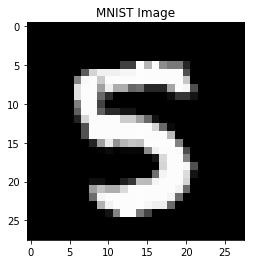

In [24]:
test_img,img=get_image_pixels(120)
mat = np.reshape(img,(28,28))

# Creates PIL image
img = Image.fromarray( mat , 'L')
plt.imshow(img)
plt.title('MNIST Image')
plt.show()

In [25]:
spike_freqs_img_120=get_spike_freqs_from_image(120)
print(spike_freqs_img_120)

[5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 6.3, 6.3, 10.2, 8.7, 10.1, 7.9, 7.5, 7.5, 5.8, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 6.9, 9.3, 9.9, 9.9, 9.9, 10.0, 10.0, 10.1, 10.1, 10.1, 10.1, 10.1, 10.1, 6.6, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1,

In [ ]:
start_scope()
a=spike_freqs_img_120*Hz
P = PoissonGroup(784,20*Hz)
refrac_e = 1. * ms

eqs = '''
        dv/dt = ((v_rest_e - v) + (I_synE+I_synI) / nS) / (2*ms)  : volt (unless refractory)
        I_synE = ge * nS *         -v                           : amp
        I_synI = gi * nS * (-70.*mV-v)                          : amp
        dge/dt = -ge/(1.0*ms)                                   : 1
        dgi/dt = -gi/(2.0*ms)                                  : 1
    '''

#neuron=NeuronGroup(1,eqs,threshold='v>Vt',reset='v=Vr',method='exact')
neuron= NeuronGroup(1, eqs, threshold= 'v>Vt',refractory=refrac_e, reset= 'v=Vr', method='euler')
neuron.v=Vr
synapses=Synapses(P,neuron,'w: siemens')
synapses.connect(i=0,j=0)
synapses.w = 25*nS
M = SpikeMonitor(P)
N=SpikeMonitor(neuron)
run(5*second)
brian_plot(M)

In [ ]:
synapses.w

In [ ]:
print(synapses.i[:])
print(synapses.t[:])

In [ ]:
brian_plot(N)

In [27]:
v_rest_e = -65. * mV
v_rest_i = -60. * mV
v_reset_e = -65. * mV
v_reset_i = -45. * mV
v_thresh_e = -52. * mV
v_thresh_i = -40. * mV
refrac_e = 5. * ms
refrac_i = 2. * ms

In [28]:
no_exci=400
no_inhi=no_exci

v_reset_e = 'v = v_reset_e; theta += theta_plus_e; timer = 0*ms'

v_thresh_e_eqn = '(v>(theta - offset + v_thresh_e)) and (timer>refrac_e)'
v_thresh_i_eqn = 'v>v_thresh_i'
v_reset_i_eqn = 'v=v_reset_i'

In [29]:
exc_neurons = '''
        dv/dt = ((v_rest_e - v) + (I_synE+I_synI) / nS) / (100*ms)  : volt (unless refractory)
        I_synE = ge * nS *         -v                           : amp
        I_synI = gi * nS * (-100.*mV-v)                          : amp
        dge/dt = -ge/(1.0*ms)                                   : 1
        dgi/dt = -gi/(2.0*ms)                                  : 1
        '''


In [30]:
inh_neurons = '''
        dv/dt = ((v_rest_i - v) + (I_synE+I_synI) / nS) / (10*ms)  : volt (unless refractory)
        I_synE = ge * nS *         -v                           : amp
        I_synI = gi * nS * (-85.*mV-v)                          : amp
        dge/dt = -ge/(1.0*ms)                                   : 1
        dgi/dt = -gi/(2.0*ms)                                  : 1
        '''

In [ ]:
neuron_groups['e'] = NeuronGroup(no_exci*len(population_names), exc_neurons, threshold= v_thresh_e_eqn, refractory= refrac_e, reset= v_reset_e, method='euler')

In [ ]:
neuron_groups['i'] = NeuronGroup(no_inhi*len(population_names), inh_neurons, threshold= v_thresh_i_eqn, refractory= refrac_i, reset= v_reset_i_eqn, method='euler')

In [ ]:
pre = 'Apost += w'
model='''w:1
         dApre/dt=-Apre/taupre : 1 (event-driven)
         dApost/dt=-Apost/taupost : 1 (event-driven)'''



ei_connection=Synapses(neuron_groups['e'], neuron_groups['i'], model=model, on_pre=pre)

In [ ]:
for i in range(no_exci):
    ei_connection.connect(neuron_groups[i][0],neuron_groups[i][0])